#### Author: Yash Shinge - IPNNL
#### Program assignment 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = 6,6
plt.rcParams["axes.grid"] = True
plt.rcParams["font.size"] = 13.0

## Main

In [2]:
Nx = 100
Nm = 100

In [3]:
def signal(w, Nx):
    
    S = np.zeros((Nx,), float)
    for i in range(1, Nx+1):
        S[i-1] = i * np.exp(-i/6) *np.cos(w*i)
        
    return S

In [4]:
x = signal(0.7, Nx) +signal(1.8, Nx) + signal(2.9, Nx)

----
### AMP

In [5]:
def AMP(Nm, x, Nx):
    
    Am = np.zeros((Nm,), float)
    w = np.zeros((Nm,), float)
    pi = np.pi

    for k in range(1, Nm+1):
        w[k-1] = (pi * (k-1))/(Nm-1)

        Z = np.exp(1j * w[k-1])

        amplitude = 0

        for m in range(1, Nx+1):
            amplitude += x[m-1] * (Z ** (m-1))

        Am[k-1] = abs(amplitude)
    return Am, w

In [6]:
amp, w = AMP(Nm, x, Nx)

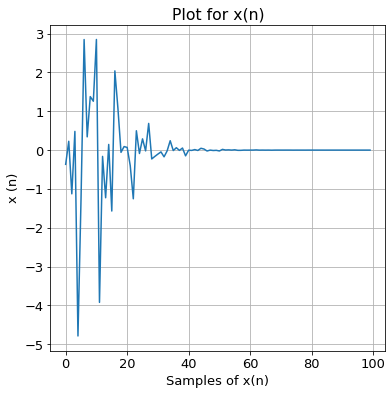

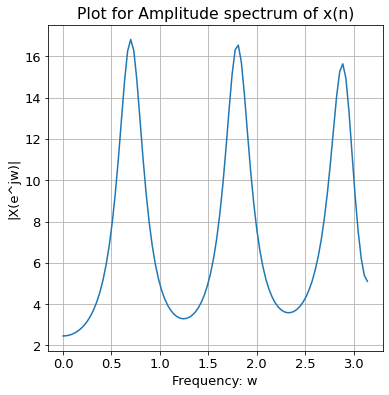

In [7]:
plt.plot(x)
plt.title('Plot for x(n)')
plt.xlabel('Samples of x(n)')
plt.ylabel('x (n)')
plt.show()

plt.plot(w, amp)
plt.title('Plot for Amplitude spectrum of x(n)')
plt.xlabel('Frequency: w')
plt.ylabel('|X(e^jw)|')
plt.show()

----
### DSINE

In [8]:
def DSINE(Nh, wc1, wc2):
    d = (1 + Nh)/2
    h = np.zeros((Nh,), float)
    pi = np.pi

    for i in range(1, Nh+1):
        if i == d:
            h[i - 1 ] = (wc2 - wc1) / pi
        else:
            h[i - 1] = ( np.sin(wc2 * (i - d )) - np.sin(wc1 * (i-d)) ) / (pi * (i - d))
            
    return h

In [9]:
Nm = 100
Nh = 51

wc1 = 1
wc2 = 2

In [10]:
h = DSINE(Nh, wc1, wc2)

In [11]:
amp, w = AMP(Nm, h, Nh)

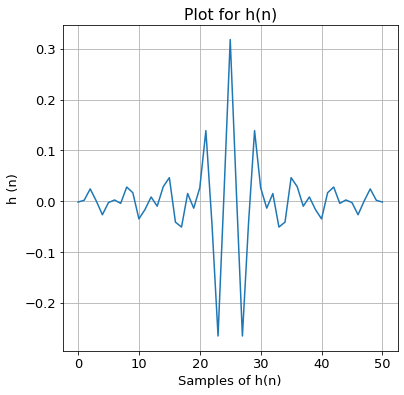

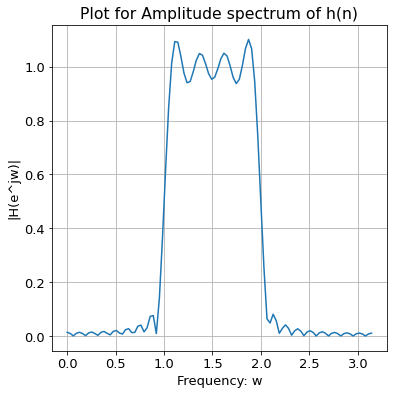

In [12]:
plt.plot(h)
plt.title('Plot for h(n)')
plt.xlabel('Samples of h(n)')
plt.ylabel('h (n)')
plt.show()

plt.plot(w, amp)
plt.title('Plot for Amplitude spectrum of h(n)')
plt.xlabel('Frequency: w')
plt.ylabel('|H(e^jw)|')
plt.show()

----
### Conv

In [13]:
def standard_conv(x, h):
    
    Nx = len(x)
    Nh = len(h)
    X = np.hstack((x, np.zeros((Nx,), float)))
    H = np.hstack((h, np.zeros((Nh,), float)))
    
    
    Ny = Nx + Nh - 1
    y = np.zeros((Ny,), float)

    for p in range(Ny):
        for q in range(Nh):
            if (p - q + 1 > 0):
                y[p] += H[q] * X[ p - q]
                
    return y


In [14]:
Nx = 100
Nm = 100
Nh = 51

wc1 = 1
wc2 = 2

x = signal(0.7,Nx)+ signal(1.6,Nx)+ signal(2.9,Nx)

h = DSINE(Nh, wc1, wc2)

y = standard_conv(x, h)

Ny = len(y);

amp, w = AMP(Nm, y, Ny)

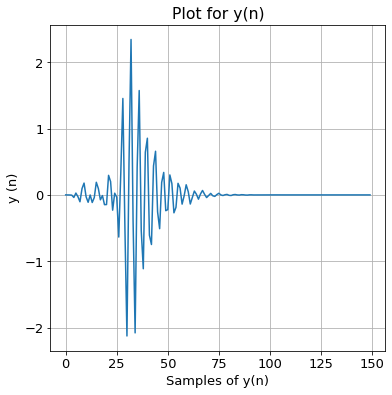

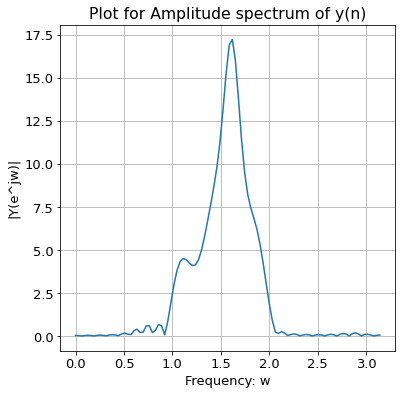

In [15]:
plt.plot(y)
plt.title('Plot for y(n)')
plt.xlabel('Samples of y(n)')
plt.ylabel('y (n)')
plt.show()

plt.plot(w, amp)
plt.title('Plot for Amplitude spectrum of y(n)')
plt.xlabel('Frequency: w')
plt.ylabel('|Y(e^jw)|')
plt.show()